In [92]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
from matplotlib import pyplot as plt

import numpy as np

In [94]:
import auttitude as at

In [95]:
from math import radians, degrees

In [96]:
at.sphere_plane(at.dcos_plane(((120,30), (80, 60))))

array([[ 120.,   30.],
       [  80.,   60.]])

In [97]:
x = at.Line(at.dcos_line((60, 45)))
y = at.Line(at.dcos_line((200, 60)))
z = at.Line(at.dcos_line((250, 15)))

In [98]:
degrees(x.angle(z))

119.31583848129381

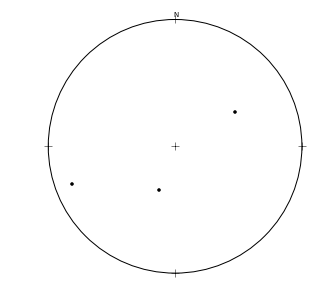

In [99]:
fig, ax = plt.subplots(figsize=(5, 5))
plot = at.ProjectionPlot(ax)
plot.clear_diagram()
plot.plot_poles(x)
plot.plot_poles(y)
plot.plot_poles(z)

In [100]:
data_lines = at.SphericalData(at.dcos_line(((60, 45), (200, 60), (250, 15))))

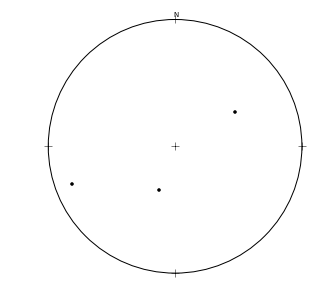

In [101]:
fig, ax = plt.subplots(figsize=(5, 5))
plot = at.ProjectionPlot(ax)
plot.clear_diagram()
plot.plot_poles(data_lines)

In [102]:
x = at.Plane(at.dcos_plane((60, 45)))
y = at.Plane(at.dcos_plane((200, 60)))
z = at.Plane(at.dcos_plane((250, 15)))

In [103]:
x.intersect(y).sphere

(124.42981391944566, 23.345820885635106)

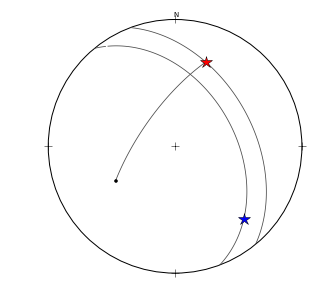

In [104]:
fig, ax = plt.subplots(figsize=(5, 5))
plot = at.ProjectionPlot(ax)
plot.clear_diagram()
plot.plot_poles(x)
plot.plot_poles(y, marker='*', ms=12, c='r')
#plot.plot_poles(z)
plot.plot_poles(x.rotation_matrix(30).dot(y), marker='*', ms=12, c='b')
plot.plot_circles(x.small_circle(x.angle(y)))
plot.plot_circles(x.arc(y))

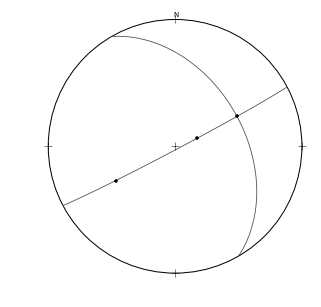

In [105]:
fig, ax = plt.subplots(figsize=(5, 5))
plot = at.ProjectionPlot(ax)
plot.clear_diagram()
plot.plot_poles(x)
plot.plot_circles(x.great_circle())
plot.plot_poles(z)
plot.plot_poles(x.rejection_matrix.dot(z))
plot.plot_circles(x.intersect(z).great_circle())

In [106]:
data_planes = at.PlaneData(at.dcos_plane(((60, 60), (200, 60), (250, 15))))

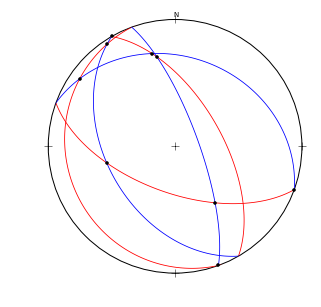

In [107]:
fig, ax = plt.subplots(figsize=(5, 5))
plot = at.ProjectionPlot(ax)
plot.clear_diagram()
#plot.plot_poles(data_planes)
plot.plot_circles(data_planes.great_circle(), color='r')
plot.plot_circles(data_lines.great_circle(), color='b')
plot.plot_poles(data_planes.intersection(data_lines))

In [108]:
data = at.PlaneData(at.dcos_plane(np.loadtxt("tocher.txt")))

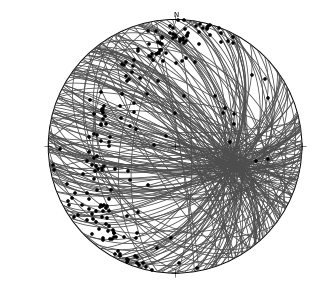

In [109]:
fig, ax = plt.subplots(figsize=(5, 5))
plot = at.ProjectionPlot(ax)
plot.clear_diagram()
plot.plot_poles(data)
plot.plot_circles(data.great_circle())

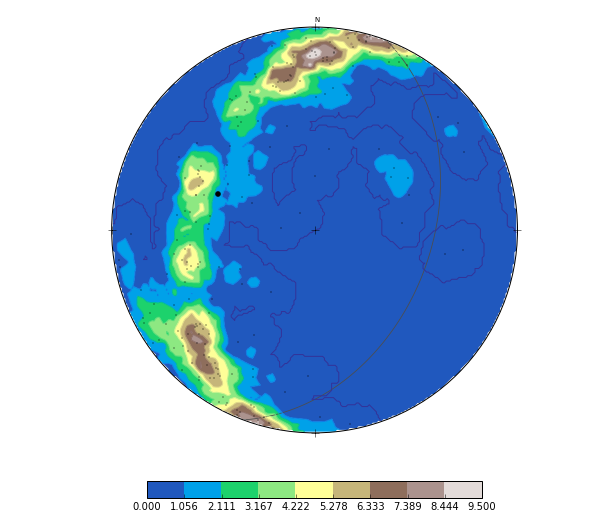

In [112]:
fig, ax = plt.subplots(figsize=(10, 10))
plot = at.ProjectionPlot(ax)
data = at.PlaneData(at.dcos_plane(np.loadtxt("tocher.txt")))
plot.clear_diagram()
plot.plot_poles(data, ms=.5)
fit_plane = data.stats.mean_vector
plot.plot_poles(fit_plane, ms=5)
plot.plot_circles(fit_plane.great_circle())
c = plot.plot_contours(at.default_grid.grid, data.count_kamb(), len(data), cmap='terrain')
plt.colorbar(c, shrink=.6, orientation='horizontal', pad=.05)